In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('114.xls') 
years = df.iloc[:, 0].values 
data = df.iloc[:, 1:].values  


X = df[['MD', 'CSDA', 'MH', 'WFL', 'LT']]
y = df['HFWCZ']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor()


param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("best: ", grid_search.best_params_)


best_model = grid_search.best_estimator_


y_train_pred = best_model.predict(X_train)


mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


print(f"train MSE: {mse_train:.4f}")
print(f"train RMSE: {rmse_train:.4f}")
print(f"train MAE: {mae_train:.4f}")
print(f"train R2: {r2_train:.4f}")


y_val_pred = best_model.predict(X_val)


mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)


print(f"train MSE: {mse_val:.4f}")
print(f"train RMSE: {rmse_val:.4f}")
print(f"验证集 MAE: {mae_val:.4f}")
print(f"验证集 R2: {r2_val:.4f}")

D:\Anaconda\Anaconda3-2020.07\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 1496 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 1605 out of 1620 | elapsed:   32.0s remaining:    0.2s


最佳参数:  {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
训练集 MSE: 18.2686
训练集 RMSE: 4.2742
训练集 MAE: 3.4164
训练集 R2: 0.9846
验证集 MSE: 884.1834
验证集 RMSE: 29.7352
验证集 MAE: 18.4252
验证集 R2: 0.7639


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   32.4s finished


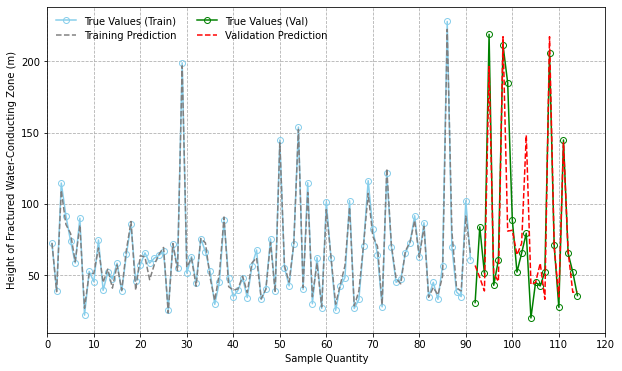

In [4]:

plt.figure(figsize=(10, 6))


y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()


train_index = np.arange(1, len(y_train_np) + 1)
plt.plot(train_index, y_train_np, 'o-', label="True Values (Train)", color='skyblue', markerfacecolor='none')
plt.plot(train_index, y_train_pred, '--', label="Training Prediction", color="#808080")


val_index = np.arange(len(y_train_np) + 1, len(y_train_np) + len(y_val_np) + 1)
plt.plot(val_index, y_val_np, 'o-', label="True Values (Val)", color='green', markerfacecolor='none')
plt.plot(val_index, y_val_pred, '--', label="Validation Prediction", color='red')


plt.xlim([0, 120])
plt.xticks(np.arange(0, 121, 10))

plt.xlabel('Sample Quantity')
plt.ylabel('Height of Fractured Water-Conducting Zone (m)')
# plt.title('Training and Validation Data and Predictions')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False, ncol=2)

plt.grid(True, linestyle='--')


plt.savefig('fig/xgboost.png', dpi=300)
plt.savefig('fig/xgboost.pdf', dpi=600, format='pdf')  # Save each plot
plt.show()